<a href="https://colab.research.google.com/github/gbanite/CodingTasks/blob/main/DeepLearning_CNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras import layers, models, regularizers

In [2]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


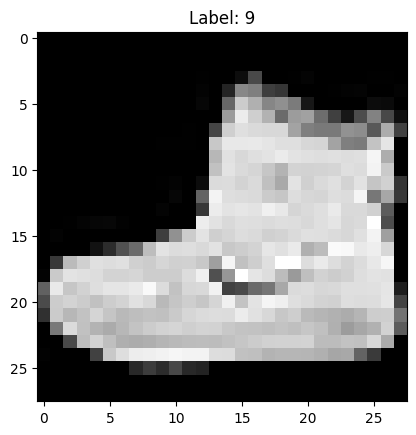

In [3]:
# Visualize a random sample image
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

In [8]:
# Reshape data for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define CNN architecture
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                      kernel_regularizer=regularizers.l1(0.01)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1(0.01)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# Implement k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
avg_accuracy, avg_loss = [], []

for train_idx, val_idx in kf.split(x_train):
    model = create_model()
    history = model.fit(x_train[train_idx], y_train[train_idx], epochs=10, validation_data=(x_train[val_idx], y_train[val_idx]), verbose=1)
    val_loss, val_acc = model.evaluate(x_train[val_idx], y_train[val_idx], verbose=0)
    avg_loss.append(val_loss)
    avg_accuracy.append(val_acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.1114 - loss: 7.5150 - val_accuracy: 0.0987 - val_loss: 2.5700
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0985 - loss: 2.5696 - val_accuracy: 0.1004 - val_loss: 2.5691
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1029 - loss: 2.5693 - val_accuracy: 0.0997 - val_loss: 2.5692
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0978 - loss: 2.5694 - val_accuracy: 0.1009 - val_loss: 2.5701
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0983 - loss: 2.5695 - val_accuracy: 0.0997 - val_loss: 2.5688
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0992 - loss: 2.5693 - val_accuracy: 0.1004 - val_loss: 2.5691
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0991 - loss: 2.5694 - val_accuracy: 0.1002 - val_loss: 2.5689
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1021 - loss: 2.569

In [6]:
# Evaluate final model on test set
final_loss, final_acc = model.evaluate(x_test, y_test, verbose=1)
print(f'Final Test Accuracy: {final_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0998 - loss: 2.5664
Final Test Accuracy: 10.00%


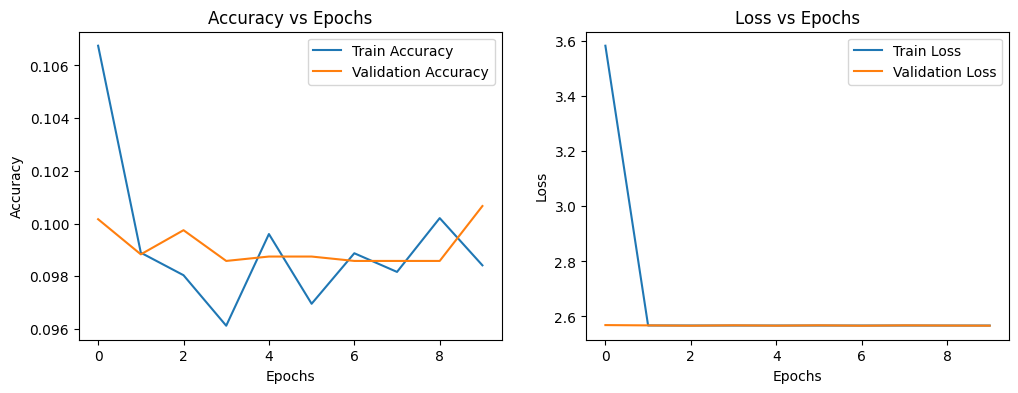

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
 [[   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]]


In [7]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

# Generate confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
conf_matrix = tf.math.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix.numpy())